In [1]:
# all imports must go here
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import os
import shutil
import glob
import random
import cv2 as cv
import sys
from tqdm import tqdm
import json
import re
from sklearn.cluster import AgglomerativeClustering
import time
from collections import OrderedDict

In [2]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/FeedRecSys

/content/drive/My Drive/FeedRecSys


#Load the text from the JSON file

In [24]:
import pickle


# k = file name , v = vector
full_dict = pickle.load(open('trainxception_embed.pickle', 'rb'))

df_dict = {}
for k,v in full_dict.items():
  # print(v[0].shape)
  vect = np.squeeze(v)
  df_dict.update({k.split('.')[0]:[vect]})

In [25]:
# for k,v in full_dict.items():
#   print(k,v)

fn_imvec_df = pd.DataFrame.from_dict(df_dict, orient='index')
fn_imvec_df.head()

,0
B074QX7M8V,"[0.061061025, -0.016783595, -0.9064268, -1.017..."
B074R1JWMK,"[0.078798, -0.25778127, -0.40453646, -0.743510..."
B074R742FC,"[0.22072405, 0.13214481, -0.012926623, -0.6340..."
B074R2K948,"[0.07639131, 0.37661654, -0.48496258, -0.30007..."
B074R72VTL,"[-0.2122095, -0.14806546, -0.23794179, -0.6039..."


In [26]:
fn_imvec_df.reset_index(inplace=True)
fn_imvec_df.head()

,index,0
0,B074QX7M8V,"[0.061061025, -0.016783595, -0.9064268, -1.017..."
1,B074R1JWMK,"[0.078798, -0.25778127, -0.40453646, -0.743510..."
2,B074R742FC,"[0.22072405, 0.13214481, -0.012926623, -0.6340..."
3,B074R2K948,"[0.07639131, 0.37661654, -0.48496258, -0.30007..."
4,B074R72VTL,"[-0.2122095, -0.14806546, -0.23794179, -0.6039..."


In [27]:


fn_imvec_df.rename(columns = {'index':'filename', 0:'imgvector'}, inplace = True)

fn_imvec_df.columns


Index(['filename', 'imgvector'], dtype='object')

In [28]:
# k =sentence , v = vector
sentence_emb_map = pickle.load(open('sentence_emb_map.pickle', 'rb'))

file_title_map = {}

title_vec_map = {}
for k, v in sentence_emb_map.items():
  v_pad = np.pad(v,(640,640),mode='constant')
  file_name = k.split(" ")[0]
  desc = k.split(" ")[1:5]
  # print(file_name, " ".join(desc))
  file_title_map.update({file_name:" ".join(desc)})
  title_vec_map.update({file_name:[v_pad]})

sentence_file_emb_df = pd.DataFrame.from_dict(file_title_map, orient='index')

sentence_file_emb_df.reset_index(inplace=True)

sentence_file_emb_df.head()


sentence_file_emb_df.rename(columns = {'index':'filename', 0:'title'}, inplace = True)

In [29]:
title_file_emb_df = pd.DataFrame.from_dict(title_vec_map, orient='index')

title_file_emb_df.reset_index(inplace=True)


title_file_emb_df.rename(columns = {'index':'filename', 0:'vector'}, inplace = True)


title_file_emb_df.columns
result = pd.merge(sentence_file_emb_df, title_file_emb_df)
# result.rename(columns = {'index':'filename1', '0':'title','index':'filename2','0':'vector'}, inplace = True)

In [30]:
result.head()

,filename,title,vector
0,B014JPMA40,lunn womens devise asymmetrical,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,B073S6HVB8,aline womens large solid,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,B01K4OUKME,ro de twopocket,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,B01N58LEUA,leslie li womens graphic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,B074WCB5RT,pleione womens medium vneck,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [31]:
final_res = pd.merge(result,fn_imvec_df)

final_res.head()

,filename,title,vector,imgvector
0,B014JPMA40,lunn womens devise asymmetrical,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0050017685, 0.049482852, -0.33078018, -0.3..."
1,B073S6HVB8,aline womens large solid,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0021574348, -0.02063778, 0.112851, -0.15916..."
2,B01K4OUKME,ro de twopocket,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.030362856, 0.28949007, 0.2111963, -0.306007..."
3,B01N58LEUA,leslie li womens graphic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23306258, 0.3061099, -0.29055125, -0.276021..."
4,B074WCB5RT,pleione womens medium vneck,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.075896755, 0.3506029, -0.32186007, -0.1374..."


In [32]:
# import numpy as np

# x = np.array([[1, 2, 3,4], [4, 5, 6,7]])
# x = np.append(x, [np.zeros(4) for _ in range(13)] , axis=0)
# print(x.shape)
# print(x)

In [33]:
title_vec = final_res['vector'].tolist()
img_vect = final_res['imgvector'].tolist()

a1 = np.array(title_vec)

a2 = np.array(img_vect)

print(a1.shape, a2.shape)

#both are same shapes, hence adding is appropriate

c_added = np.add(a1, a2)

print(c_added.shape)

(16022, 2048) (16022, 2048)
(16022, 2048)


In [34]:
# import pickle

# k = review  v = vector

# review_emb_map = pickle.load(open('review_emb_map.pickle', 'rb'))

In [15]:
# for k, v in review_emb_map.items():
#   print(k)


In [16]:
# fname_list = []
# f_rvw_map = {}
# for k,v in review_emb_map.items():
#   fname = k.split(" ")[0]
#   rvw = " ".join(k.split(" ")[1:])
#   fname_list.append(fname)
#   f_rvw_map.update({fname:rvw})

In [17]:
# fname_list = []
# sentence_list_emb = {}
# for k, v in sentence_emb_map.items():
#   fname = k.split(" ")[0]
#   # fname_list.append(fname)
#   sentence_list_emb.update({fname:v})

# fname_list[:3]

# sentence_list_emb


# fname_list = []
# sentence_list_emb = {}
# for k, v in review_emb_map.items():
#   fname = k.split(" ")[0]
#   # fname_list.append(fname)
#   sentence_list_emb.update({fname:v})


In [18]:
# construct_map_concatembed = {}
# squeezed_map = {}

# source_dict = OrderedDict(sorted(sentence_list_emb.items()))
# dest_dict = OrderedDict(sorted(df_dict.items()))
# for (k1,v1), (k2,v2) in zip(source_dict.items(),dest_dict.items()):
#   keyfname = k2.split('.')[0]
#   # print("keyfname=",keyfname)
#   # print("k1=",k1)
#   if k1 == keyfname:
#     # print(type(v2))
#     v2_array = np.array(v2)
#     v1_reshaped = v1.reshape(1,-1)
#     # print(v1_reshaped.shape, v2_array.shape)
#     concat_val = np.concatenate((v1_reshaped, v2_array), axis=1)
#     # concat_val = v1_reshaped+v2
#     construct_map_concatembed.update({k1:concat_val})
#     squeezed_map.update({k1:[np.squeeze(concat_val)]})




In [19]:
# final_df = pd.DataFrame.from_dict(squeezed_map, orient='index')

In [20]:
# final_df.head(-100)

In [21]:
# v_list = []
# key_list = []
# for k,v in full_dict.items():
#   v_list.append(v)
#   key_list.append(k.split(".")[0])


# v_array = np.squeeze(np.asarray(v_list), axis=1)
# v_array.shape

In [22]:
# v_array = np.squeeze(np.asarray(list(construct_map_concatembed.values())),axis=1)



In [35]:

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

def plot_elbow(doc_vec):
    euclidean_distances= []
    # standard_scale = StandardScaler().fit_transform(doc_vec)
    cluster_num = range(10, 100, 10)
    for num in cluster_num:
        algo = KMeans(n_clusters = num,  init='k-means++',random_state=33)
        algo = algo.fit(doc_vec)
        euclidean_distances.append(algo.inertia_)

    plt.plot(cluster_num,euclidean_distances,'bo-')
    plt.xlabel('cluster numbers')
    plt.ylabel('euclidean distances')
    plt.title('Elbow plot')
    plt.show()
    plt.savefig('elbowplot.png')

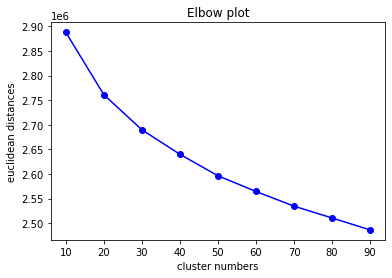

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_elbow(c_added)

In [21]:
def si_score(scaled_features):
    silhouette_coefficients = {}
    # standard_scale = StandardScaler().fit_transform(scaled_features)
    for k in range(10, 40, 10):
      kmeans = KMeans(n_clusters = k,  init='k-means++', random_state=33)
      # kmeans.fit(scaled_features)
      cluster_labels = kmeans.fit_predict(scaled_features)
      score = silhouette_score(scaled_features, cluster_labels)
      silhouette_coefficients = score
    return silhouette_coefficients,kmeans

In [ ]:
silhouette_coefficients = si_score(c_added)
print("silhouette_coefficients=",silhouette_coefficients)

silhouette_coefficients= (0.020761793, KMeans(n_clusters=30, random_state=33))


In [ ]:




for linkage in ("ward", "average", "complete", "single"):
  for k in range(10, 40, 10):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    cluster_labels = clustering.fit_predict(c_added)

    score = silhouette_score(c_added, cluster_labels)
    silhouette_coefficients = score
    

    print(("for {} linkage, number of cluster  = {} the silhouette_coefficients is {}").format(linkage,k,silhouette_coefficients))
  print("#"*50)




for ward linkage, number of cluster  = 10 the silhouette_coefficients is 0.007575543597340584
for ward linkage, number of cluster  = 20 the silhouette_coefficients is 0.002719510579481721
for ward linkage, number of cluster  = 30 the silhouette_coefficients is 0.001066788099706173
##################################################
for average linkage, number of cluster  = 10 the silhouette_coefficients is 0.15282239019870758
for average linkage, number of cluster  = 20 the silhouette_coefficients is 0.11686045676469803
for average linkage, number of cluster  = 30 the silhouette_coefficients is 0.0868614986538887
##################################################
for complete linkage, number of cluster  = 10 the silhouette_coefficients is 0.028182242065668106
for complete linkage, number of cluster  = 20 the silhouette_coefficients is 0.010244956240057945
for complete linkage, number of cluster  = 30 the silhouette_coefficients is 0.0104455491527915
#####################################

In [42]:
from operator import or_
title_vec = final_res['vector'].tolist()
img_vect = final_res['imgvector'].tolist()

a1 = np.array(title_vec)

a2 = np.array(img_vect)

print(a1.shape, a2.shape)

#both are same shapes, hence adding is appropriate



# c_added = np.add(a1, a2)


# c_added = np.ma.array(a1+a2,mask=map(or_,a1.mask,a2.mask))
c_added = np.concatenate((a1,a2), axis=1)

print(c_added.shape)

# mask = np.all(np.equal(c_added, 0), axis=1)

# print(mask)
# new_c_added = c_added[~mask]

# print(c_added[~mask].shape)


(16022, 2048) (16022, 2048)
(16022, 4096)


In [43]:
# for item in c_added:
#   print(item)

In [45]:
for linkage in ("complete","single"):
  for k in range(20, 40, 10):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    cluster_labels = clustering.fit_predict(c_added)

    score = silhouette_score(c_added, cluster_labels)
    silhouette_coefficients = score
    

    print(("for {} linkage, number of cluster  = {} the silhouette_coefficients is {}").format(linkage,k,silhouette_coefficients))
  print("#"*50)

for complete linkage, number of cluster  = 20 the silhouette_coefficients is 0.002217445522546768
for complete linkage, number of cluster  = 30 the silhouette_coefficients is 0.002987972693517804
##################################################
for single linkage, number of cluster  = 20 the silhouette_coefficients is 0.12187718600034714
for single linkage, number of cluster  = 30 the silhouette_coefficients is 0.10500175505876541
##################################################


#Umap vizualisation of the agglomerative clustering

In [46]:
!pip install umap-learn[plot]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 1.1 MB 52.9 MB/s 
     |████████████████████████████████| 18.2 MB 21.8 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ccb546697ae7ab088d2f9b90855cbf61980bb49d8c9e622b208d993d8dc25c70
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=9671b68ce0d86f6c99af155e7c3c98649a8eb5e64471d8c52f66fe031b1ed76a
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=8e1de2abbd64293dbaed7098cefc97fe8d7d518daf7d6f93c

In [50]:
import umap.umap_ as umap
import umap.plot

mapper = umap.UMAP().fit(c_added)

clustering = AgglomerativeClustering(linkage='single', n_clusters=30)
cluster_labels = clustering.fit_predict(c_added)

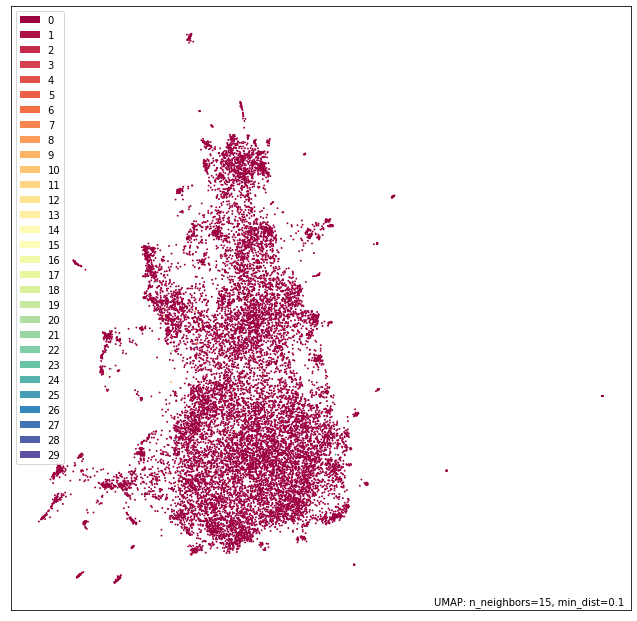

In [51]:
umap.plot.points(mapper, labels=cluster_labels)

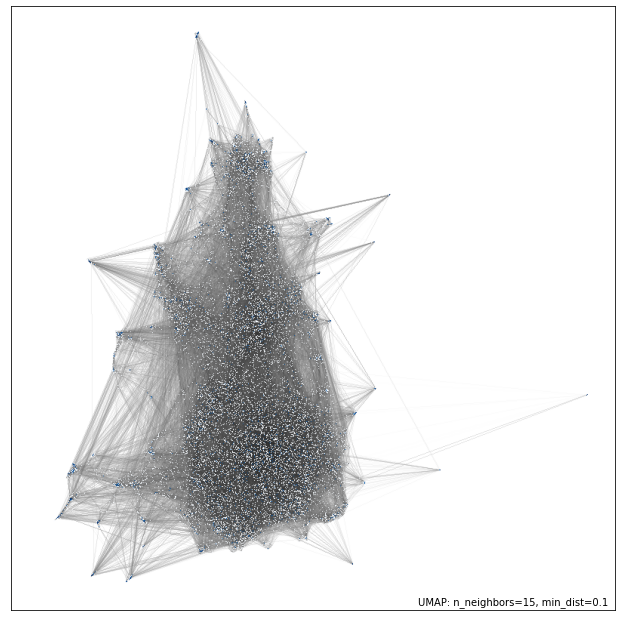

In [52]:
umap.plot.connectivity(mapper, show_points=True)

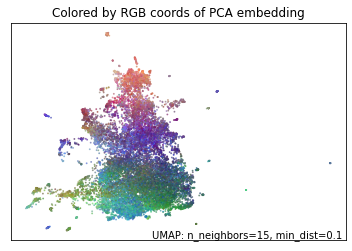

In [53]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

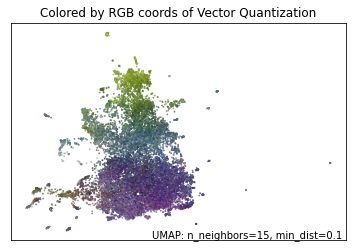

In [57]:
umap.plot.diagnostic(mapper, diagnostic_type='vq')

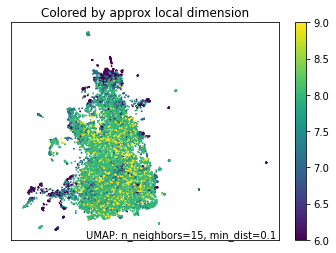

In [58]:
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')

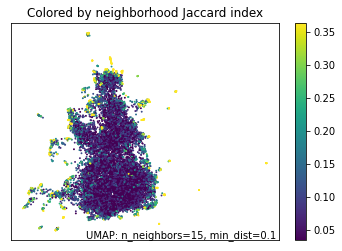

In [59]:
umap.plot.diagnostic(mapper, diagnostic_type='neighborhood')